In [2]:
import numpy as np #python library that deals with numeric arrays
import pandas as pd #python library that uses numpy for more complex dataframes and structures
import matplotlib.pyplot as plt #python library for ploting

#this makes matplotlib show the figures instead of saving it to a folder
%matplotlib inline

#Question 1.4

In [3]:
#Creating a dataframe with the provided info

df = pd.DataFrame({
        'Company':['GM','Ford','Exxon','IBM','GeneralElectric','Mobil','PhilipMorris','Chrysler','DuPont','Texaco'],
        'x1':[126974,96933,86656,63438,55264,50976,39069,36156,35209,32416],
        'x2':[4224,3835,3510,3758,3939,1809,2946,359,2480,2413],
        'x3':[173297,160893,83219,77734,128344,39080,38528,51038,34715,25636]})

In [4]:
#see the dataframe
df

,Company,x1,x2,x3
0,GM,126974,4224,173297
1,Ford,96933,3835,160893
2,Exxon,86656,3510,83219
3,IBM,63438,3758,77734
4,GeneralElectric,55264,3939,128344
5,Mobil,50976,1809,39080
6,PhilipMorris,39069,2946,38528
7,Chrysler,36156,359,51038
8,DuPont,35209,2480,34715
9,Texaco,32416,2413,25636


###Doing a scatrerplot of x1 and x2

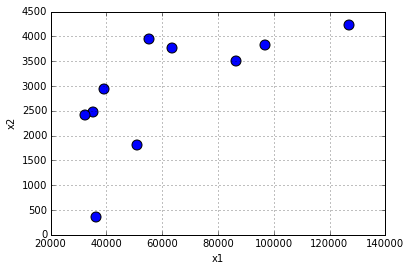

In [5]:

plt.scatter(df['x1'],df['x2'], s=100, marker='o')
plt.grid(b=True)
plt.xlabel('x1')
plt.ylabel('x2')

###Matplotlib doesn't really have an option to easily plot the marginal dot diagrams. We will try to plot it by creating a figure and splitting it in three parts: Scatter of x1,x2 ; Scatter of x1 only, and Scatter of x2 only

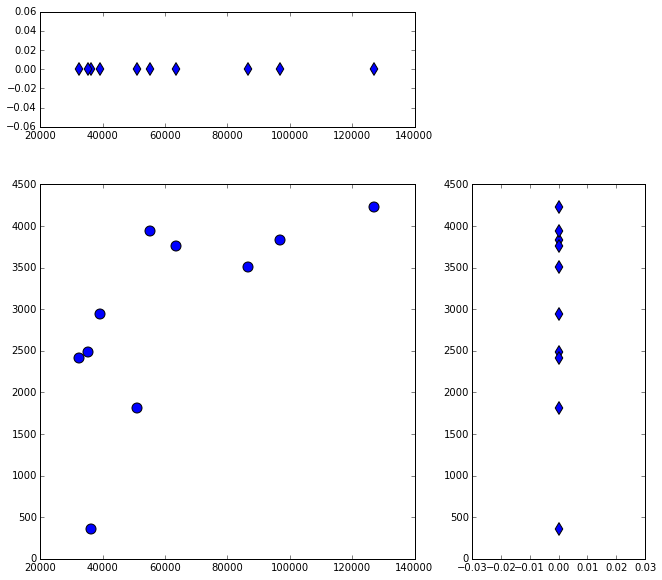

In [6]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = 0.85

rect_scatter = [left, bottom, width, height]
rect_x = [left, bottom_h, width, 0.2]
rect_y = [left_h, bottom, 0.3, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

xyScatter = plt.axes(rect_scatter)
xScatter = plt.axes(rect_x)
yScatter = plt.axes(rect_y)

# the scatter plots:
xyScatter.scatter(df['x1'],df['x2'], s=100, marker='o')

xScatter.scatter(df['x1'], np.zeros(len(df['x1'])),s=80,marker='d')

yScatter.scatter(np.zeros(len(df['x2'])),df['x2'],s=80,marker='d')


###We can observe that the relationship between x1 and x2 (sales and profits) are somewhat linear

###Calculating the mean of X1 and X2

In [7]:
df[['x1','x2']].mean()

x1    62309.1
x2     2927.3
dtype: float64

###Calculating the variance of X1 and X2


In [8]:
df[['x1','x2']].var()

x1    1.000509e+09
x2    1.430020e+06
dtype: float64

###Calculating the covariance of X1 and X2
####This actually computes a pairwise variance, so it shows the individual variance as well (x11 and x22)

In [9]:
df[['x1','x2']].cov()

,x1,x2
x1,1.000509e+09,25575599.633333
x2,2.557560e+07,1430020.011111


###calculating the correlation between x1 and x2

In [10]:
df[['x1','x2']].corr()

,x1,x2
x1,1.000000,0.676152
x2,0.676152,1.000000


####here we see that r12 indicates a fairly-strong positive correlation between the sales and profit. That is, as sales increases, the company's profit increases as well. 
####The 0.67... correaltion value indicates that the two variables aren't totally linearly correlated (We can get that just by observing the scatterplot). They might be better correlated by a 2-degree or 3-degree equation (we don't know)

####The correlation can be better visualized by creating a trendline between x1 and x2

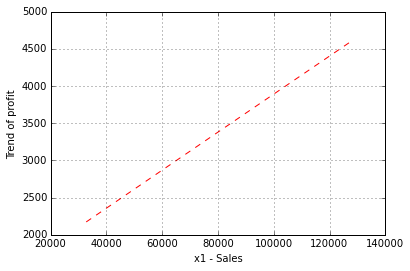

In [11]:
z = np.polyfit(df['x1'],df['x2'], 1)  #This calculates the angular and linear coeff for a trendline
p = np.poly1d(z)                      #This transforms the above values in a 1-degree linear equation
plt.plot(df['x1'],p(df['x1']),"r--")  #This plots the values of x1 and evaluation of the equation for x1
plt.grid(b=True)
plt.xlabel('x1 - Sales')
plt.ylabel('Trend of profit')

#Question 1.5

###Plotting the diagrams for x2 and x3

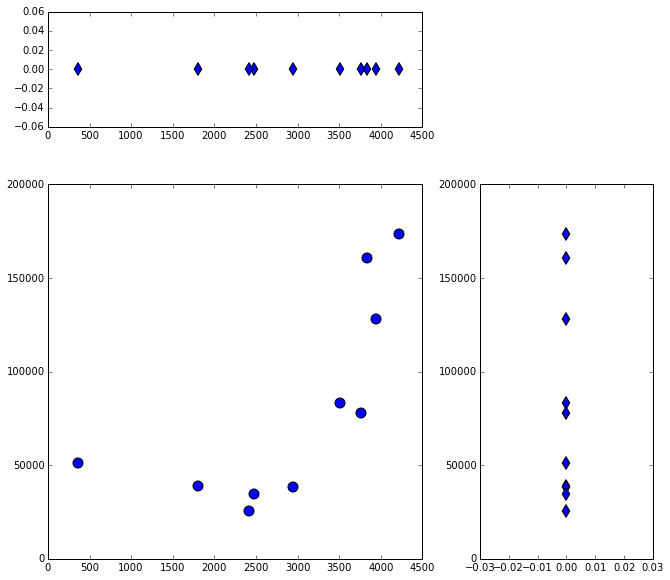

In [12]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = 0.85

rect_scatter = [left, bottom, width, height]
rect_x = [left, bottom_h, width, 0.2]
rect_y = [left_h, bottom, 0.3, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

xyScatter = plt.axes(rect_scatter)
xScatter = plt.axes(rect_x)
yScatter = plt.axes(rect_y)

# the scatter plots:
xyScatter.scatter(df['x2'],df['x3'], s=100, marker='o')

xScatter.scatter(df['x2'], np.zeros(len(df['x2'])),s=80,marker='d')

yScatter.scatter(np.zeros(len(df['x3'])),df['x3'],s=80,marker='d')

###The two variables here look like exponentially related

###Plotting the diagrams for x1 and x3

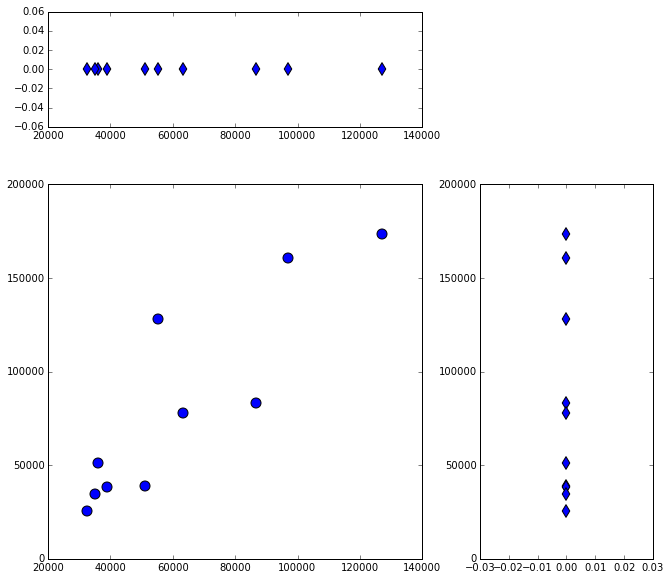

In [13]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = 0.85

rect_scatter = [left, bottom, width, height]
rect_x = [left, bottom_h, width, 0.2]
rect_y = [left_h, bottom, 0.3, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

xyScatter = plt.axes(rect_scatter)
xScatter = plt.axes(rect_x)
yScatter = plt.axes(rect_y)

# the scatter plots:
xyScatter.scatter(df['x1'],df['x3'], s=100, marker='o')

xScatter.scatter(df['x1'], np.zeros(len(df['x1'])),s=80,marker='d')

yScatter.scatter(np.zeros(len(df['x3'])),df['x3'],s=80,marker='d')

###X1 and x3 look more linearly correlated

###Computing the Average, Variance and correlations

In [15]:
df[['x1','x2','x3']].mean()

x1    62309.1
x2     2927.3
x3    81248.4
dtype: float64

In [14]:
df[['x1','x2','x3']].cov()

,x1,x2,x3
x1,1.000509e+09,25575599.633333,1.511827e+09
x2,2.557560e+07,1430020.011111,4.565462e+07
x3,1.511827e+09,45654618.422222,2.980490e+09


In [16]:
df[['x1','x2','x3']].corr()

,x1,x2,x3
x1,1.000000,0.676152,0.875483
x2,0.676152,1.000000,0.699310
x3,0.875483,0.699310,1.000000


###Indeed we observe that X1 and X3 are very correlated, and x2 and x3 are fairly correlated

#Question 1.9

In [17]:
df2 = pd.DataFrame({'x1':[-6,-3,-2,1,2,5,6,8],'x2':[-2,-3,1,-1,2,1,5,3]})

In [18]:
df2

,x1,x2
0,-6,-2
1,-3,-3
2,-2,1
3,1,-1
4,2,2
5,5,1
6,6,5
7,8,3


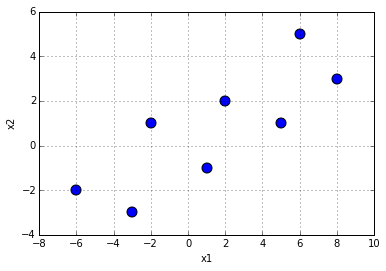

In [24]:
plt.scatter(df2['x1'],df2['x2'], s=100)
plt.grid(b=True)
plt.xlabel('x1')
plt.ylabel('x2')

In [26]:
df2[['x1','x2']].cov()

,x1,x2
x1,23.410714,10.392857
x2,10.392857,7.071429


###using formula (1-18)
### ~x1 = x1*cos(teta) + x2*sin(teta)
###~x2 = -x1*sin(teta) + x2*cos(teta)

In [35]:
import math
df2['~x1'] = df2['x1']*math.cos(math.radians(26)) + df2['x2']*math.sin(math.radians(26))
df2['~x2'] = -1*df2['x1']*math.sin(math.radians(26)) + df2['x2']*math.cos(math.radians(26))

In [36]:
df2

,x1,x2,~x1,~x2
0,-6,-2,-6.269507,0.832639
1,-3,-3,-4.011496,-1.381269
2,-2,1,-1.359217,1.775536
3,1,-1,0.460423,-1.337165
4,2,2,2.674330,0.920846
5,5,1,4.932341,-1.293062
6,6,5,7.584620,1.863743
7,8,3,8.505466,-0.810587


###computing the sample variance of the normalized variables ~x1 and ~x2

In [41]:
df2[['~x1','~x2']].var()

~x1    28.460489
~x2     2.021654
dtype: float64

###transforming the new measurements

In [45]:
x1n = 4* math.cos(math.radians(26)) - 2*math.sin(math.radians(26))
x2n = -4*math.sin(math.radians(26)) - 2*math.cos(math.radians(26))

In [49]:
[x1n, x2n]

[2.7184338916185133, -3.5510726797546437]

###Computing the new distance with the formula (1-17)

In [54]:
distOP = math.sqrt((math.pow(x1n,2)/df2['~x1'].var()) + (math.pow(x2n,2)/df2['~x2'].var()))
distOP

2.548956537243963